# **Installing required libraries**



In [ ]:
!pip install findspark

# **Spark Session**

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession;

spark = SparkSession.builder.master("local[4]").appName("ISM6562 Spark App01").enableHiveSupport().getOrCreate();

# Let's get the SparkContext object. It's the entry point to the Spark API. It's created when you create a sparksession
sc = spark.sparkContext

# note: If you have multiple spark sessions running (like from a previous notebook you've run),
# this spark session webUI will be on a different port than the default (4040). One way to
# identify this part is with the following line. If there was only one spark session running,
# this will be 4040. If it's higher, it means there are still other spark sesssions still running.
spark_session_port = spark.sparkContext.uiWebUrl.split(":")[-1]
print("Spark Session WebUI Port: " + spark_session_port)

Spark Session WebUI Port: 4040


# Reading the data

In [ ]:
import pandas as pd
from google.colab import files
upload = files.upload()


Saving tn_nashville_2020_04_01.csv to tn_nashville_2020_04_01.csv


In [ ]:
# Load CSV data into a DataFrame
#df_csv = spark.read.csv("/content/tn_nashville_2020_04_01.csv", header=True, inferSchema=True, .option("mode", "dropMalformed") \)
#df_csv = spark.read.csv("/content/tn_nashville_2020_04_01.csv", header=True, inferSchema=True).option("mode", "dropMalformed")
# Load CSV data into a DataFrame
df_csv = spark.read.option("header", True) \
                   .option("inferSchema", True) \
                   .option("mode", "DROPMALFORMED") \
                   .csv("/content/tn_nashville_2020_04_01.csv")

# Show the first few rows of the DataFrame
#df_csv.show()


In [ ]:
df_csv.count()

3210329

# Printing the schema

In [ ]:
# Display the schema
df_csv.printSchema()

root
 |-- raw_row_number: string (nullable = true)
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- location: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- precinct: string (nullable = true)
 |-- reporting_area: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- subject_age: string (nullable = true)
 |-- subject_race: string (nullable = true)
 |-- subject_sex: string (nullable = true)
 |-- officer_id_hash: string (nullable = true)
 |-- type: string (nullable = true)
 |-- violation: string (nullable = true)
 |-- arrest_made: string (nullable = true)
 |-- citation_issued: string (nullable = true)
 |-- warning_issued: string (nullable = true)
 |-- outcome: string (nullable = true)
 |-- contraband_found: string (nullable = true)
 |-- contraband_drugs: string (nullable = true)
 |-- contraband_weapons: string (nullable = true)
 |-- frisk_performed: string (nullable = true)
 |-- search_conducted: 

In [ ]:
# Show a sample of the data
df_csv.show(5)

+--------------+----------+--------+--------------------+------------------+------------------+--------+--------------+----+-----------+------------+-----------+---------------+---------+--------------------+-----------+---------------+--------------+--------+----------------+----------------+------------------+---------------+----------------+-------------+--------------+--------------+--------------------+--------------------------+-----+-------------------------+--------------------------+---------------------------+------------------------------+---------------------+-------------------+----------------------+------------------+-----------------+------------------+--------------------+---------------------+
|raw_row_number|      date|    time|            location|               lat|               lng|precinct|reporting_area|zone|subject_age|subject_race|subject_sex|officer_id_hash|     type|           violation|arrest_made|citation_issued|warning_issued| outcome|contraband_found|co

# Coverting the data types as required

In [ ]:
from pyspark.sql.functions import col, to_date
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, TimestampType

df_corrected = df_csv \
    .withColumn("raw_row_number", col("raw_row_number").cast(IntegerType())) \
    .withColumn("date", to_date(col("date"), "yyyy-MM-dd")) \
    .withColumn("lat", col("lat").cast(DoubleType())) \
    .withColumn("lng", col("lng").cast(DoubleType())) \
    .withColumn("precinct", col("precinct").cast(IntegerType())) \
    .withColumn("reporting_area", col("reporting_area").cast(IntegerType())) \
    .withColumn("zone", col("zone").cast(IntegerType())) \
    .withColumn("subject_age", col("subject_age").cast(IntegerType())) \
    .withColumn("arrest_made", col("arrest_made").cast(BooleanType())) \
    .withColumn("citation_issued", col("citation_issued").cast(BooleanType())) \
    .withColumn("warning_issued", col("warning_issued").cast(BooleanType())) \
    .withColumn("contraband_found", col("contraband_found").cast(BooleanType())) \
    .withColumn("contraband_drugs", col("contraband_drugs").cast(BooleanType())) \
    .withColumn("contraband_weapons", col("contraband_weapons").cast(BooleanType())) \
    .withColumn("frisk_performed", col("frisk_performed").cast(BooleanType())) \
    .withColumn("search_conducted", col("search_conducted").cast(BooleanType())) \
    .withColumn("search_person", col("search_person").cast(BooleanType())) \
    .withColumn("search_vehicle", col("search_vehicle").cast(BooleanType())) \
    .withColumn("raw_verbal_warning_issued", col("raw_verbal_warning_issued").cast(BooleanType())) \
    .withColumn("raw_written_warning_issued", col("raw_written_warning_issued").cast(BooleanType())) \
    .withColumn("raw_traffic_citation_issued", col("raw_traffic_citation_issued").cast(BooleanType())) \
    .withColumn("raw_misd_state_citation_issued", col("raw_misd_state_citation_issued").cast(BooleanType())) \
    .withColumn("raw_driver_searched", col("raw_driver_searched").cast(BooleanType())) \
    .withColumn("raw_passenger_searched", col("raw_passenger_searched").cast(BooleanType())) \
    .withColumn("raw_search_consent", col("raw_search_consent").cast(BooleanType())) \
    .withColumn("raw_search_arrest", col("raw_search_arrest").cast(BooleanType())) \
    .withColumn("raw_search_warrant", col("raw_search_warrant").cast(BooleanType())) \
    .withColumn("raw_search_inventory", col("raw_search_inventory").cast(BooleanType())) \
    .withColumn("raw_search_plain_view", col("raw_search_plain_view").cast(BooleanType()))

In [ ]:
# Display the schema
df_corrected.printSchema()

root
 |-- raw_row_number: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- location: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- precinct: integer (nullable = true)
 |-- reporting_area: integer (nullable = true)
 |-- zone: integer (nullable = true)
 |-- subject_age: integer (nullable = true)
 |-- subject_race: string (nullable = true)
 |-- subject_sex: string (nullable = true)
 |-- officer_id_hash: string (nullable = true)
 |-- type: string (nullable = true)
 |-- violation: string (nullable = true)
 |-- arrest_made: boolean (nullable = true)
 |-- citation_issued: boolean (nullable = true)
 |-- warning_issued: boolean (nullable = true)
 |-- outcome: string (nullable = true)
 |-- contraband_found: boolean (nullable = true)
 |-- contraband_drugs: boolean (nullable = true)
 |-- contraband_weapons: boolean (nullable = true)
 |-- frisk_performed: boolean (nullable = true)
 |-- search_c

In [ ]:
df_corrected.show(5)

+--------------+----------+--------+--------------------+------------------+------------------+--------+--------------+----+-----------+------------+-----------+---------------+---------+--------------------+-----------+---------------+--------------+--------+----------------+----------------+------------------+---------------+----------------+-------------+--------------+--------------+--------------------+--------------------------+-----+-------------------------+--------------------------+---------------------------+------------------------------+---------------------+-------------------+----------------------+------------------+-----------------+------------------+--------------------+---------------------+
|raw_row_number|      date|    time|            location|               lat|               lng|precinct|reporting_area|zone|subject_age|subject_race|subject_sex|officer_id_hash|     type|           violation|arrest_made|citation_issued|warning_issued| outcome|contraband_found|co

# Converting columns name as required

In [ ]:
# Renaming columns
renamed_df = df_corrected \
    .withColumnRenamed('raw_row_number', 'row_number') \
    .withColumnRenamed('date', 'stop_date') \
    .withColumnRenamed('time', 'stop_time') \
    .withColumnRenamed('location', 'stop_location') \
    .withColumnRenamed('lat', 'latitude') \
    .withColumnRenamed('lng', 'longitude') \
    .withColumnRenamed('precinct', 'police_precinct') \
    .withColumnRenamed('reporting_area', 'reporting_area_code') \
    .withColumnRenamed('zone', 'enforcement_zone') \
    .withColumnRenamed('subject_age', 'subject_age_years') \
    .withColumnRenamed('subject_race', 'subject_race_ethnicity') \
    .withColumnRenamed('subject_sex', 'subject_gender') \
    .withColumnRenamed('officer_id_hash', 'officer_id') \
    .withColumnRenamed('type', 'incident_type') \
    .withColumnRenamed('violation', 'violation_description') \
    .withColumnRenamed('arrest_made', 'is_arrest_made') \
    .withColumnRenamed('citation_issued', 'is_citation_issued') \
    .withColumnRenamed('warning_issued', 'is_warning_issued') \
    .withColumnRenamed('outcome', 'stop_outcome') \
    .withColumnRenamed('contraband_found', 'is_contraband_found') \
    .withColumnRenamed('contraband_drugs', 'is_drugs_found') \
    .withColumnRenamed('contraband_weapons', 'is_weapons_found') \
    .withColumnRenamed('frisk_performed', 'is_frisk_performed') \
    .withColumnRenamed('search_conducted', 'is_search_conducted') \
    .withColumnRenamed('search_person', 'is_person_searched') \
    .withColumnRenamed('search_vehicle', 'is_vehicle_searched') \
    .withColumnRenamed('search_basis', 'search_basis_reason') \
    .withColumnRenamed('reason_for_stop', 'stop_reason') \
    .withColumnRenamed('vehicle_registration_state', 'vehicle_reg_state') \
    .withColumnRenamed('notes', 'additional_notes') \
    .withColumnRenamed('raw_verbal_warning_issued', 'is_verbal_warning_issued') \
    .withColumnRenamed('raw_written_warning_issued', 'is_written_warning_issued') \
    .withColumnRenamed('raw_traffic_citation_issued', 'is_traffic_citation_issued') \
    .withColumnRenamed('raw_misd_state_citation_issued', 'is_misdemeanor_citation_issued') \
    .withColumnRenamed('raw_suspect_ethnicity', 'suspect_ethnicity') \
    .withColumnRenamed('raw_driver_searched', 'is_driver_searched') \
    .withColumnRenamed('raw_passenger_searched', 'is_passenger_searched') \
    .withColumnRenamed('raw_search_consent', 'is_search_with_consent') \
    .withColumnRenamed('raw_search_arrest', 'is_search_due_to_arrest') \
    .withColumnRenamed('raw_search_warrant', 'is_search_with_warrant') \
    .withColumnRenamed('raw_search_inventory', 'is_inventory_search') \
    .withColumnRenamed('raw_search_plain_view', 'is_plain_view_search')

In [ ]:
# Show the renamed DataFrame
renamed_df.show(5)

+----------+----------+---------+--------------------+------------------+------------------+---------------+-------------------+----------------+-----------------+----------------------+--------------+----------+-------------+---------------------+--------------+------------------+-----------------+------------+-------------------+--------------+----------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+-----------------+----------------+------------------------+-------------------------+--------------------------+------------------------------+-----------------+------------------+---------------------+----------------------+-----------------------+----------------------+-------------------+--------------------+
|row_number| stop_date|stop_time|       stop_location|          latitude|         longitude|police_precinct|reporting_area_code|enforcement_zone|subject_age_years|subject_race_ethnicity|subject_gender|

In [ ]:
renamed_df.printSchema()

root
 |-- row_number: integer (nullable = true)
 |-- stop_date: date (nullable = true)
 |-- stop_time: string (nullable = true)
 |-- stop_location: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- police_precinct: integer (nullable = true)
 |-- reporting_area_code: integer (nullable = true)
 |-- enforcement_zone: integer (nullable = true)
 |-- subject_age_years: integer (nullable = true)
 |-- subject_race_ethnicity: string (nullable = true)
 |-- subject_gender: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- incident_type: string (nullable = true)
 |-- violation_description: string (nullable = true)
 |-- is_arrest_made: boolean (nullable = true)
 |-- is_citation_issued: boolean (nullable = true)
 |-- is_warning_issued: boolean (nullable = true)
 |-- stop_outcome: string (nullable = true)
 |-- is_contraband_found: boolean (nullable = true)
 |-- is_drugs_found: boolean (nullable = true)
 |-- is_weapons_

# Data Cleaning

In [ ]:
df_cleaned = renamed_df.dropna()

In [ ]:
df_cleaned.count()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
df_cleaned.show(5)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

# Store the transformed data in a persistent table

In [ ]:
# Assuming you have a Spark session initialized as spark

# Define the table name
table_name = "transformed_data_table"

# Write the DataFrame to a persistent table
df_cleaned.write.mode("overwrite").saveAsTable(table_name)

# Optionally, you can specify the format
# df_cleaned.write.mode("overwrite").format("parquet").saveAsTable(table_name)


In [ ]:
spark.sql("SHOW TABLES").show()

+---------+--------------------+-----------+
|namespace|           tableName|isTemporary|
+---------+--------------------+-----------+
|  default|transformed_data_...|      false|
+---------+--------------------+-----------+



In [ ]:
spark.sql("SELECT * FROM transformed_data_table").show()

+----------+----------+---------+--------------------+------------------+------------------+---------------+-------------------+----------------+-----------------+----------------------+--------------+----------+-------------+---------------------+--------------+------------------+-----------------+------------+-------------------+--------------+----------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+-----------------+--------------------+------------------------+-------------------------+--------------------------+------------------------------+-----------------+------------------+---------------------+----------------------+-----------------------+----------------------+-------------------+--------------------+
|row_number| stop_date|stop_time|       stop_location|          latitude|         longitude|police_precinct|reporting_area_code|enforcement_zone|subject_age_years|subject_race_ethnicity|subject_gen

# Create a temporary view of the data

In [ ]:
# Create a temporary view from df_cleaned
df_cleaned.createOrReplaceTempView("cleaned_data_view")

# Now you can run SQL queries on this temporary view
result_df = spark.sql("SELECT * FROM cleaned_data_view LIMIT 10")
result_df.show()


+----------+----------+---------+--------------------+------------------+------------------+---------------+-------------------+----------------+-----------------+----------------------+--------------+----------+-------------+---------------------+--------------+------------------+-----------------+------------+-------------------+--------------+----------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+-----------------+----------------+------------------------+-------------------------+--------------------------+------------------------------+-----------------+------------------+---------------------+----------------------+-----------------------+----------------------+-------------------+--------------------+
|row_number| stop_date|stop_time|       stop_location|          latitude|         longitude|police_precinct|reporting_area_code|enforcement_zone|subject_age_years|subject_race_ethnicity|subject_gender|

# **Basic EDA**

In [ ]:
# Example of running a query in Spark SQL
result = spark.sql("""
    SELECT subject_race_ethnicity, COUNT(*) AS total_stops
    FROM cleaned_data_view
    GROUP BY subject_race_ethnicity
    ORDER BY total_stops DESC
""")
result.show()


+----------------------+-----------+
|subject_race_ethnicity|total_stops|
+----------------------+-----------+
|                 black|      38421|
|                 white|      26130|
|              hispanic|       5206|
|  asian/pacific isl...|        417|
|               unknown|        323|
|                 other|         86|
|                    NA|         37|
+----------------------+-----------+



In [ ]:
# SQL Query for basic summary stats of `subject_age_years`
result1 = spark.sql("""
SELECT
    AVG(subject_age_years) AS avg_age,
    MIN(subject_age_years) AS min_age,
    MAX(subject_age_years) AS max_age,
    STDDEV(subject_age_years) AS stddev_age
FROM cleaned_data_view
""")
result1.show()


+-----------------+-------+-------+------------------+
|          avg_age|min_age|max_age|        stddev_age|
+-----------------+-------+-------+------------------+
|31.24276408949306|     10|     99|11.482083053490443|
+-----------------+-------+-------+------------------+



In [ ]:
# Calculate median using `percentile_approx`
result2 = spark.sql("""
SELECT percentile_approx(subject_age_years, 0.5) AS median_age
FROM cleaned_data_view
""")
result2.show()


+----------+
|median_age|
+----------+
|        28|
+----------+



In [ ]:
#Group by `subject_race_ethnicity` and get the number of stops
result3 = spark.sql("""
SELECT subject_race_ethnicity, COUNT(*) AS total_stops
FROM cleaned_data_view
GROUP BY subject_race_ethnicity
ORDER BY total_stops DESC
""")
result3.show()


+----------------------+-----------+
|subject_race_ethnicity|total_stops|
+----------------------+-----------+
|                 black|      38421|
|                 white|      26130|
|              hispanic|       5206|
|  asian/pacific isl...|        417|
|               unknown|        323|
|                 other|         86|
|                    NA|         37|
+----------------------+-----------+



In [ ]:
#Group by `incident_type` and calculate total stops and average age
result4 = spark.sql("""
SELECT
    incident_type,
    COUNT(*) AS total_incidents,
    AVG(subject_age_years) AS avg_age
FROM cleaned_data_view
GROUP BY incident_type
ORDER BY total_incidents DESC
""")
result4.show()


+-------------+---------------+-----------------+
|incident_type|total_incidents|          avg_age|
+-------------+---------------+-----------------+
|    vehicular|          70620|31.24276408949306|
+-------------+---------------+-----------------+



# **Converting Spark DataFrame to Pandas DataFrame**



In [ ]:
pandas_df = df_cleaned.toPandas()


In [ ]:
pandas_df.count()

,0
row_number,70620
stop_date,70620
stop_time,70620
stop_location,70620
latitude,70620
longitude,70620
police_precinct,70620
reporting_area_code,70620
enforcement_zone,70620
subject_age_years,70620


**Temporal Analysis**

Stop Counts by Date

In [ ]:
df_cleaned.groupBy("stop_date").count().orderBy("stop_date").show()


+----------+-----+
| stop_date|count|
+----------+-----+
|2010-01-01|    3|
|2010-01-02|    7|
|2010-01-03|    6|
|2010-01-04|    7|
|2010-01-05|   17|
|2010-01-06|   15|
|2010-01-07|   10|
|2010-01-08|   17|
|2010-01-09|   12|
|2010-01-10|    6|
|2010-01-11|    8|
|2010-01-12|   19|
|2010-01-13|   16|
|2010-01-14|   16|
|2010-01-15|   13|
|2010-01-16|   10|
|2010-01-17|    8|
|2010-01-18|   14|
|2010-01-19|   19|
|2010-01-20|   20|
+----------+-----+
only showing top 20 rows



**Demographic Analysis**

1.Age Distribution of Subjects

array([[<Axes: title={'center': 'subject_age_years'}>]], dtype=object)

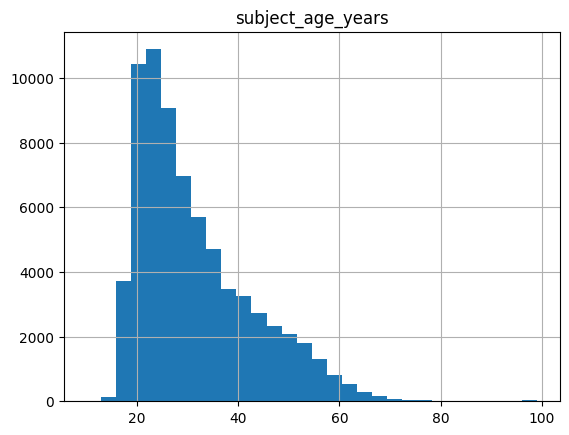

In [ ]:
df_cleaned.select("subject_age_years").toPandas().hist(column="subject_age_years", bins=30)


2. Bar chart of stops by race and ethnicity

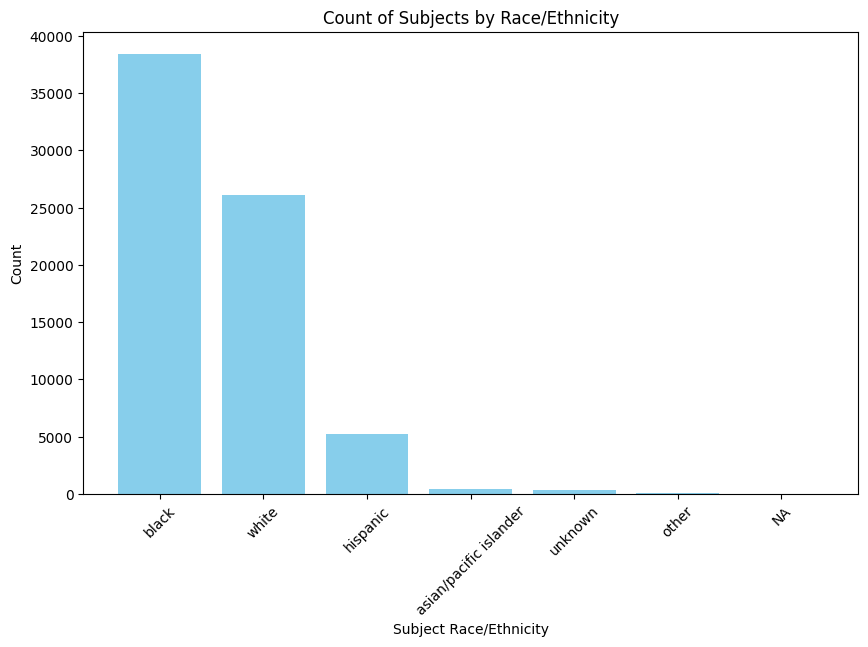

In [ ]:
import matplotlib.pyplot as plt

# Group by and count
df_grouped_race = df_cleaned.groupBy("subject_race_ethnicity").count().orderBy("count", ascending=False)

# Convert to Pandas DataFrame for easier plotting
df_pandas = df_grouped_race.toPandas()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_pandas["subject_race_ethnicity"], df_pandas["count"], color='skyblue')
plt.xlabel("Subject Race/Ethnicity")
plt.ylabel("Count")
plt.title("Count of Subjects by Race/Ethnicity")
plt.xticks(rotation=45)
plt.show()



3. Bar chart of stops by gender

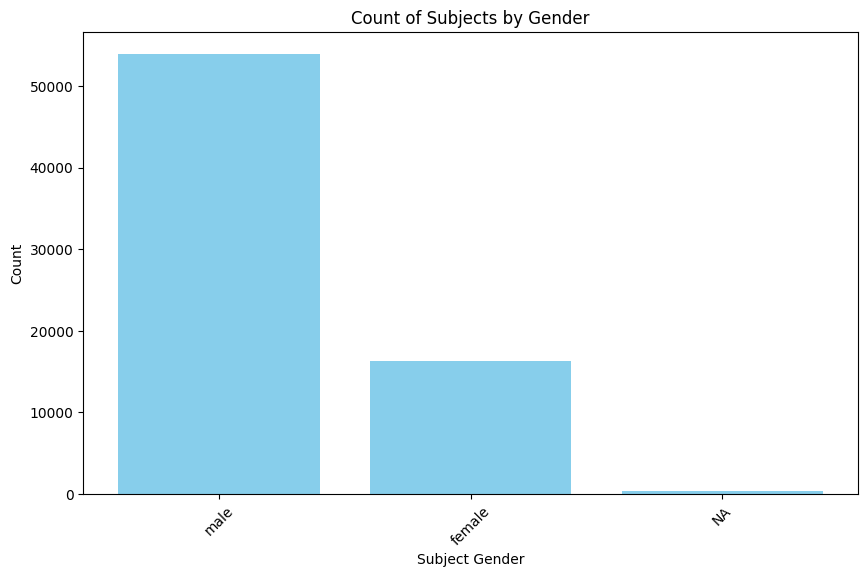

In [ ]:


# Group by and count
df_grouped_gender = df_cleaned.groupBy("subject_gender").count().orderBy("count", ascending=False)

# Convert to Pandas DataFrame for easier plotting
df_pandas_gender = df_grouped_gender.toPandas()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_pandas_gender["subject_gender"], df_pandas_gender["count"], color='skyblue')
plt.xlabel("Subject Gender")
plt.ylabel("Count")
plt.title("Count of Subjects by Gender")
plt.xticks(rotation=45)
plt.show()


**Heatmap**

In [ ]:
import pandas as pd

# Assuming df_cleaned is your DataFrame
key_columns = [
    "subject_race_ethnicity", "subject_gender", "subject_age_years",
    "is_arrest_made", "is_contraband_found", "is_drugs_found",
    "is_weapons_found", "is_search_conducted"
]

# Select relevant columns
df_selected = df_cleaned[key_columns]

# Convert the Spark DataFrame to a Pandas DataFrame
df_selected_pd = df_selected.toPandas()



In [ ]:
df_copy_pd = df_selected.toPandas()

In [ ]:
# Convert categorical variables to numerical codes for correlation computation
df_selected_pd['subject_race_ethnicity'] = df_selected_pd['subject_race_ethnicity'].astype('category').cat.codes
df_selected_pd['subject_gender'] = df_selected_pd['subject_gender'].astype('category').cat.codes


In [ ]:
# Check the data types to confirm conversion
print(df_copy_pd.dtypes)


subject_race_ethnicity    object
subject_gender            object
subject_age_years          int32
is_arrest_made              bool
is_contraband_found         bool
is_drugs_found              bool
is_weapons_found            bool
is_search_conducted         bool
dtype: object


In [ ]:
# Compute the correlation matrix
corr_matrix = df_selected_pd.corr()

# Display the correlation matrix
print(corr_matrix)


                        subject_race_ethnicity  subject_gender  \
subject_race_ethnicity                1.000000       -0.100038   
subject_gender                       -0.100038        1.000000   
subject_age_years                     0.082870        0.036471   
is_arrest_made                       -0.003089        0.000136   
is_contraband_found                   0.007944        0.012803   
is_drugs_found                       -0.005231        0.010115   
is_weapons_found                     -0.025327        0.034182   
is_search_conducted                        NaN             NaN   

                        subject_age_years  is_arrest_made  \
subject_race_ethnicity           0.082870       -0.003089   
subject_gender                   0.036471        0.000136   
subject_age_years                1.000000        0.034483   
is_arrest_made                   0.034483        1.000000   
is_contraband_found             -0.065071        0.071526   
is_drugs_found                  -0.0767

In [ ]:
df_selected_pd['subject_race_ethnicity'].head(20)



,subject_race_ethnicity
0,6
1,6
2,2
3,2
4,6
5,3
6,6
7,6
8,2
9,6


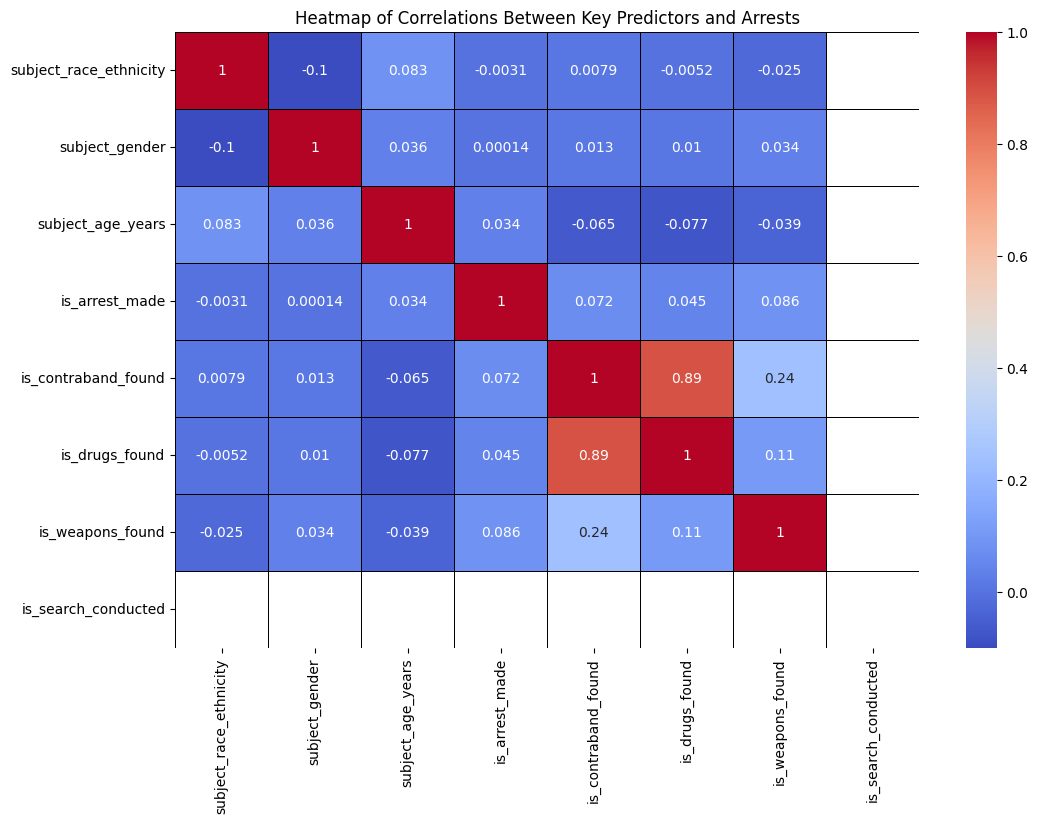

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Correlations Between Key Predictors and Arrests')
plt.show()


**Stacked Bar Chart: Outcomes of Police Stops by Race and Sex**

In [ ]:
import pandas as pd

# Assuming df_selected_pd is your Pandas DataFrame with the necessary columns
key_columns = [
    "subject_race_ethnicity", "subject_gender", "is_arrest_made"
]

# Select relevant columns
df_arrests = df_cleaned[key_columns]

# Group by race, gender, and arrest made, and count the occurrences
df_grouped = df_arrests.groupBy("subject_race_ethnicity", "subject_gender", "is_arrest_made").count()


In [ ]:
# Pivot the DataFrame to get arrest made as columns
df_pivot = df_grouped.groupBy("subject_race_ethnicity", "subject_gender").pivot("is_arrest_made").sum("count").fillna(0)

# Convert to Pandas DataFrame for plotting
df_pivot_pd = df_pivot.toPandas()


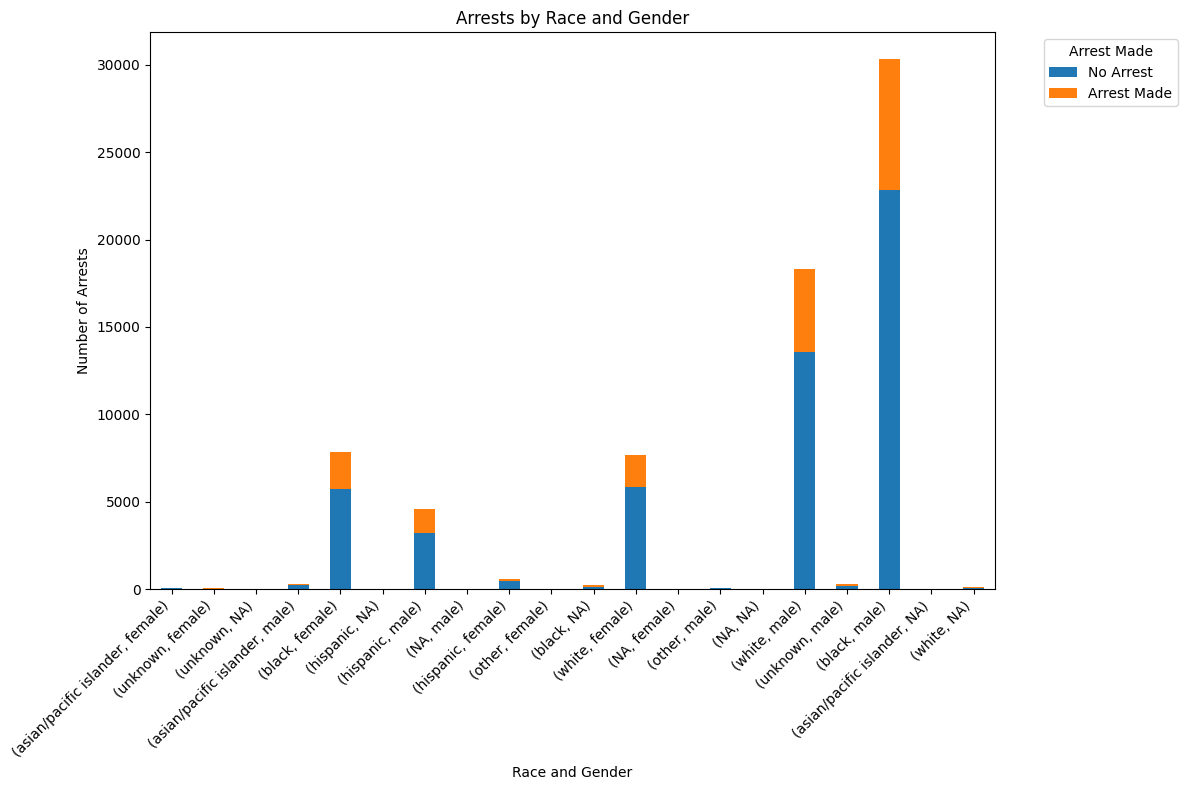

In [ ]:

# Plot the stacked bar chart
df_pivot_pd.set_index(["subject_race_ethnicity", "subject_gender"]).plot(kind='bar', stacked=True, figsize=(12, 8))

# Set labels and title
plt.xlabel("Race and Gender")
plt.ylabel("Number of Arrests")
plt.title("Arrests by Race and Gender")
plt.legend(title="Arrest Made", bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No Arrest', 'Arrest Made'])
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


**Time Series Plot: Arrest Rates Over Time**

In [ ]:
from pyspark.sql.functions import to_date

# Select relevant columns
df_arrests = df_cleaned.select("stop_date", "is_arrest_made")

# Convert stop_date to date within Spark
df_arrests = df_arrests.withColumn("stop_date", to_date("stop_date", "yyyy-MM-dd"))

# Ensure the conversion is successful
df_arrests.show()


+----------+--------------+
| stop_date|is_arrest_made|
+----------+--------------+
|2010-10-10|         false|
|2010-10-10|          true|
|2010-10-10|         false|
|2010-10-10|         false|
|2010-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2011-10-10|         false|
|2012-10-10|          true|
|2012-10-10|         false|
|2012-10-10|         false|
|2012-10-10|         false|
|2012-10-10|         false|
+----------+--------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, count, sum

# Group by stop_date and calculate the number of stops and arrests
df_daily = df_arrests.groupBy("stop_date").agg(
    count("is_arrest_made").alias("total_stops"),
    sum(col("is_arrest_made").cast("int")).alias("total_arrests")
)

# Calculate arrest rate
df_daily = df_daily.withColumn("arrest_rate", col("total_arrests") / col("total_stops"))

# Show the DataFrame to verify
df_daily.show()


+----------+-----------+-------------+-------------------+
| stop_date|total_stops|total_arrests|        arrest_rate|
+----------+-----------+-------------+-------------------+
|2012-10-06|         13|            7| 0.5384615384615384|
|2014-11-12|         44|           17|0.38636363636363635|
|2011-10-07|         13|            1|0.07692307692307693|
|2016-10-03|         23|            3|0.13043478260869565|
|2012-11-11|         44|           15| 0.3409090909090909|
|2011-11-18|         19|            2|0.10526315789473684|
|2011-11-14|         11|            1|0.09090909090909091|
|2013-11-18|         44|           10|0.22727272727272727|
|2012-11-03|         36|           13| 0.3611111111111111|
|2015-10-16|         46|            8|0.17391304347826086|
|2013-10-05|         34|            7|0.20588235294117646|
|2014-11-17|         24|            6|               0.25|
|2012-10-20|         34|           12|0.35294117647058826|
|2012-10-21|         19|           10| 0.526315789473684

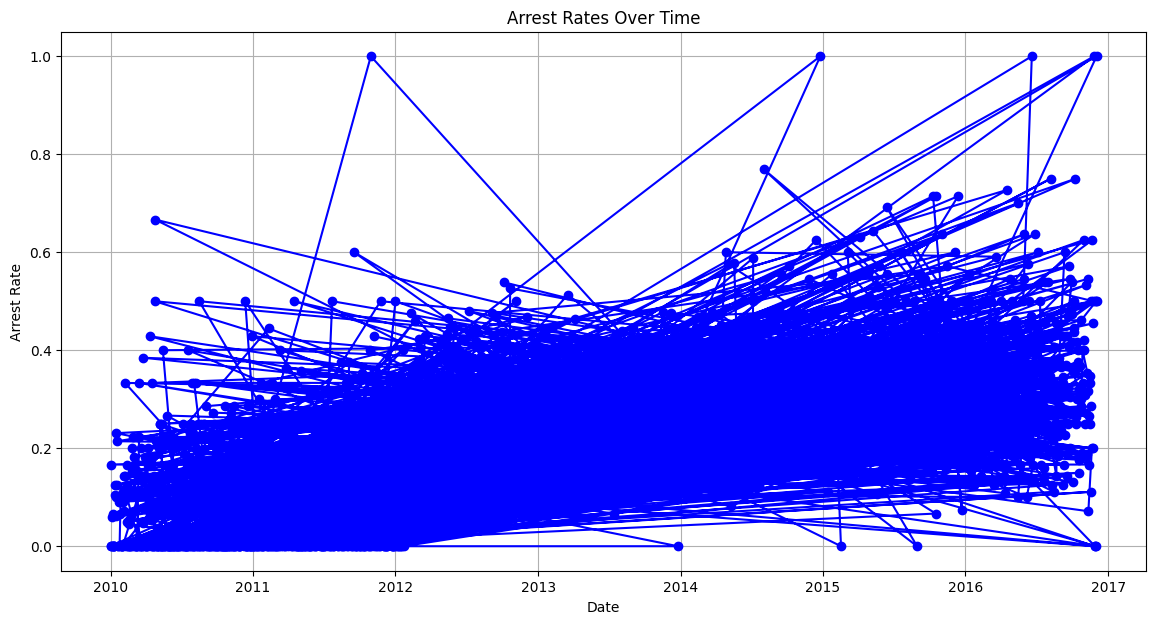

In [ ]:
# Convert to Pandas DataFrame for plotting
df_daily_pd = df_daily.toPandas()

# Plot the time series of arrest rates
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_daily_pd['stop_date'], df_daily_pd['arrest_rate'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rates Over Time")
plt.grid(True)

# Show the plot
plt.show()


**Geographic Map: Arrest Rates by Stop Location**